# 1. Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# 2. Loading the Dataset

In [4]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Perfect! The dataset contains no missing values, making preprocessing simpler.

# 3. EDA

## Target Variable Analysis

In [8]:
df["Attrition"].value_counts()

,count
Attrition,
No,1233
Yes,237


In [9]:
df["Attrition"].value_counts(normalize=True) * 100

,proportion
Attrition,
No,83.877551
Yes,16.122449


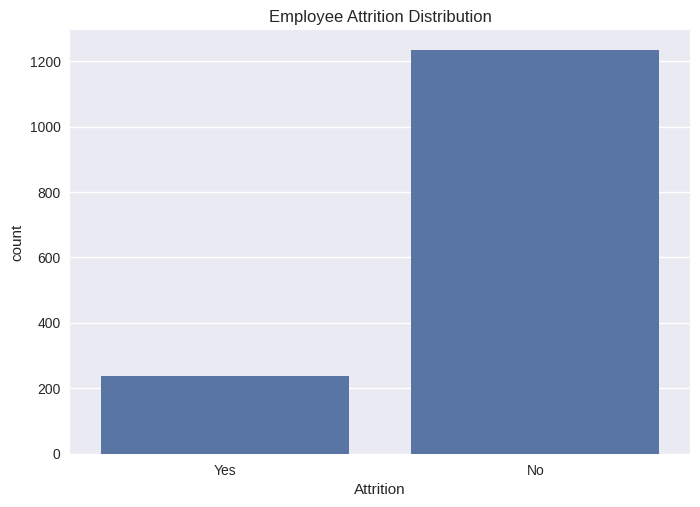

In [10]:
sns.countplot(data=df, x="Attrition")
plt.title("Employee Attrition Distribution")
plt.show()

The dataset is imbalanced, with significantly fewer employees leaving than staying.

This makes metrics like Recall and F1-score more important than accuracy.

## Attrition v/s Key Features

### Attrition v/s Department

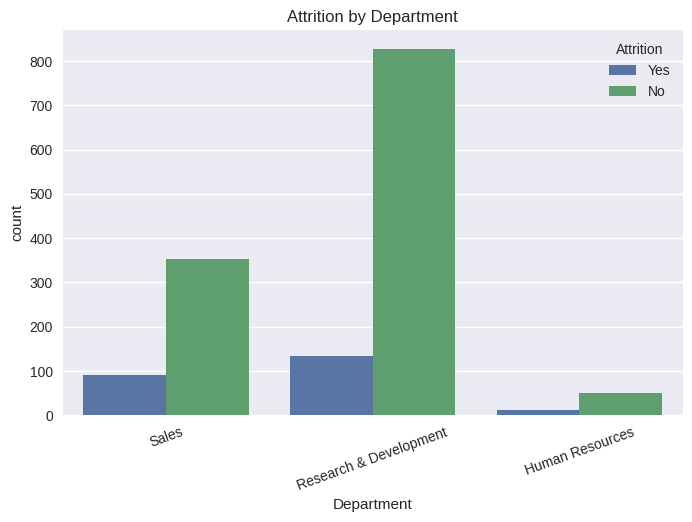

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Department", hue="Attrition")
plt.title("Attrition by Department")
plt.xticks(rotation=20)
plt.show()

### Attrition v/s Overtime (Important)

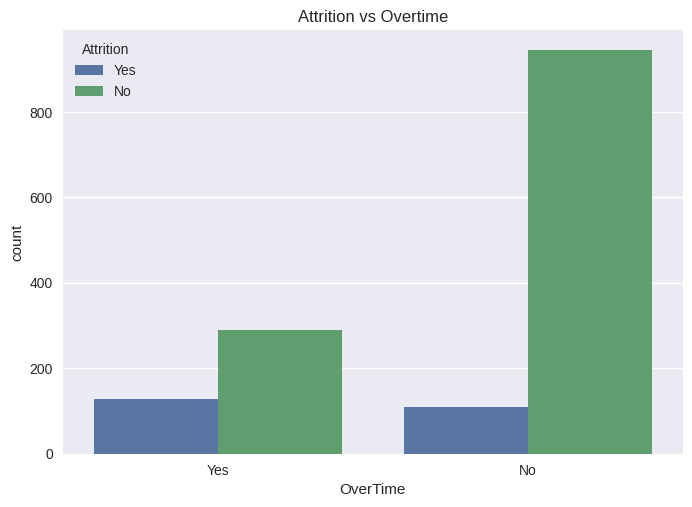

In [12]:
sns.countplot(data=df, x="OverTime", hue="Attrition")
plt.title("Attrition vs Overtime")
plt.show()

Employees working overtime show a significantly higher attrition rate.

### Attrition v/s Monthly Income

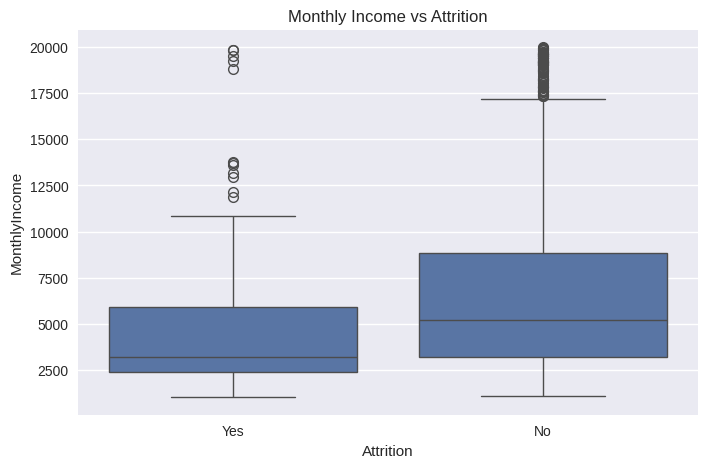

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome")
plt.title("Monthly Income vs Attrition")
plt.show()

### Attrition v/s Years at Company

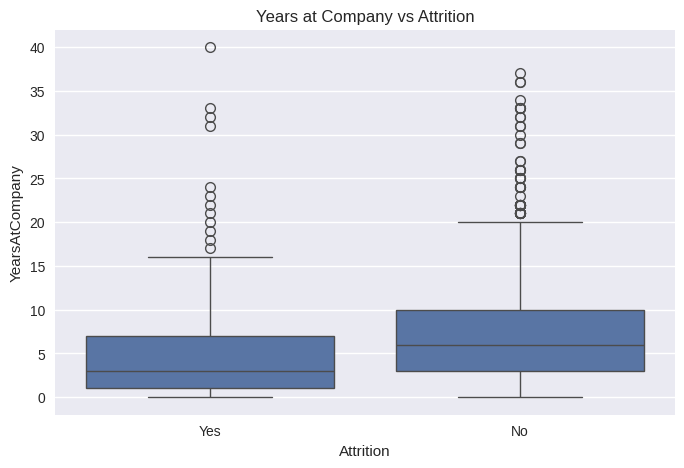

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Attrition", y="YearsAtCompany")
plt.title("Years at Company vs Attrition")
plt.show()

As expected, Employees with fewer years at the company are more expected to leave.

## Correlation Analysis

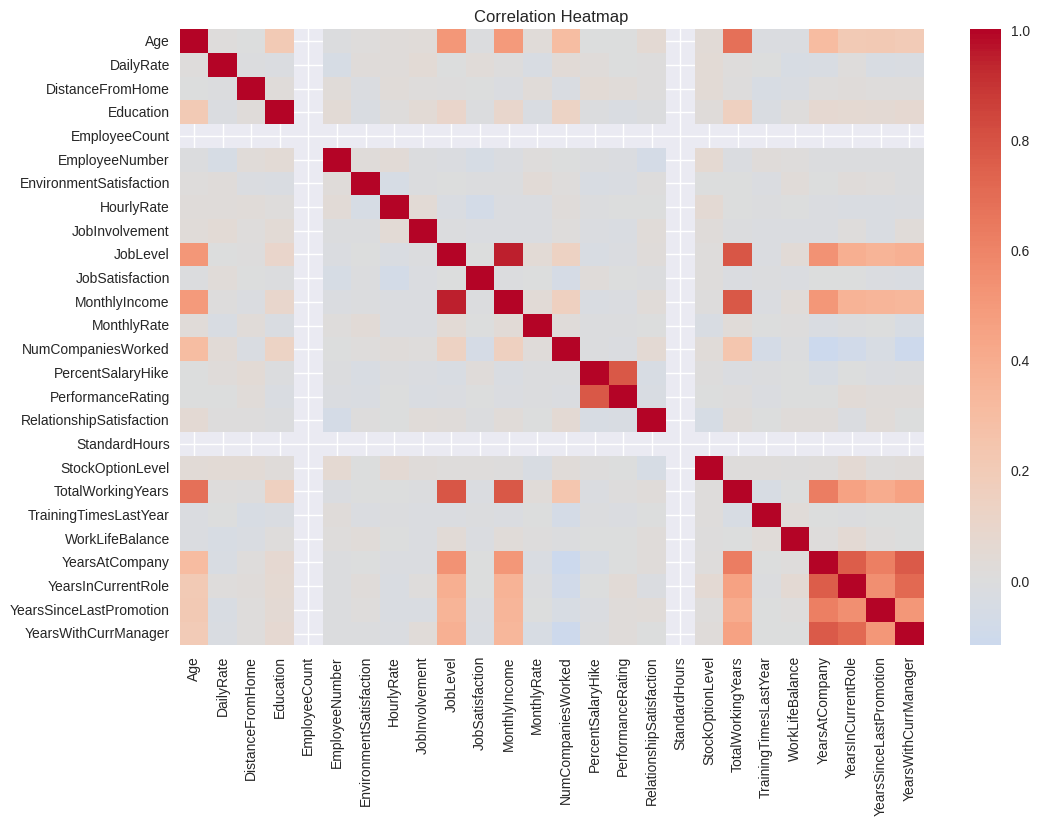

In [15]:
num_cols = df.select_dtypes(include=np.number)

plt.figure(figsize=(12,8))
sns.heatmap(num_cols.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

No single variable shows extremely high correlation, indicating the need for ML models.

**Key Insights from EDA**

1. Attrition rate is ~16%

2. Overtime is strongly associated with attrition

3. Lower income and shorter tenure increase attrition risk

4. Dataset is moderately imbalanced